MULTIPLE LINEAR REGRESSION
            CAR PRICING

Understanding the data

In [1]:
import numpy as np
import pandas as pd
from word2number import w2n
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data from csv file
data = pd.read_csv("CarPrice.csv")

In [3]:
data.shape

(205, 26)

In [4]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

Data Cleaning

1) CarName column data has audi 100 ls and audi 100ls as 2 different name which is misleading. So renaming audi 100 ls to audi 100ls
2) doornumber and  cylindernumber are in numeric words. So changing it to numbers. Using word2num library ( Use pip install word2number to install)

In [7]:
data['doornumber'].unique() #Shows door number as two and four

array(['two', 'four'], dtype=object)

In [8]:
data.doornumber = data.doornumber.apply(w2n.word_to_num)

In [9]:
data.cylindernumber= data.cylindernumber.apply(w2n.word_to_num)

In [10]:
data['CarName'].unique() #Rename - audi 100 ls to audi 100ls

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [11]:
data = data.replace({'CarName': 'audi 100 ls'}, 'audi 100ls')

In [12]:
data.head()

car_ID  symboling                   CarName fueltype aspiration  \
0       1          3        alfa-romero giulia      gas        std   
1       2          3       alfa-romero stelvio      gas        std   
2       3          1  alfa-romero Quadrifoglio      gas        std   
3       4          2                audi 100ls      gas        std   
4       5          2                audi 100ls      gas        std   

   doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0           2  convertible        rwd          front       88.6  ...   
1           2  convertible        rwd          front       88.6  ...   
2           2    hatchback        rwd          front       94.5  ...   
3           4        sedan        fwd          front       99.8  ...   
4           4        sedan        4wd          front       99.4  ...   

   enginesize  fuelsystem  boreratio  stroke compressionratio  horsepower  \
0         130        mpfi       3.47    2.68              9.0         111   
1         130        mpfi       3.47    2.68              9.0         111   
2         152        mpfi       2.68    3.47              9.0         154   
3         109        mpfi       3.19    3.40             10.0         102   
4         136        mpfi       3.19    3.40              8.0         115   

   peakrpm citympg  highwaympg    price  
0     5000      21          27  13495.0  
1     5000      21          27  16500.0  
2     5000      19          26  16500.0  
3     5500      24          30  13950.0  
4     5500      18          22  17450.0  

[5 rows x 26 columns]

Visualing the data

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualising Numeric Values

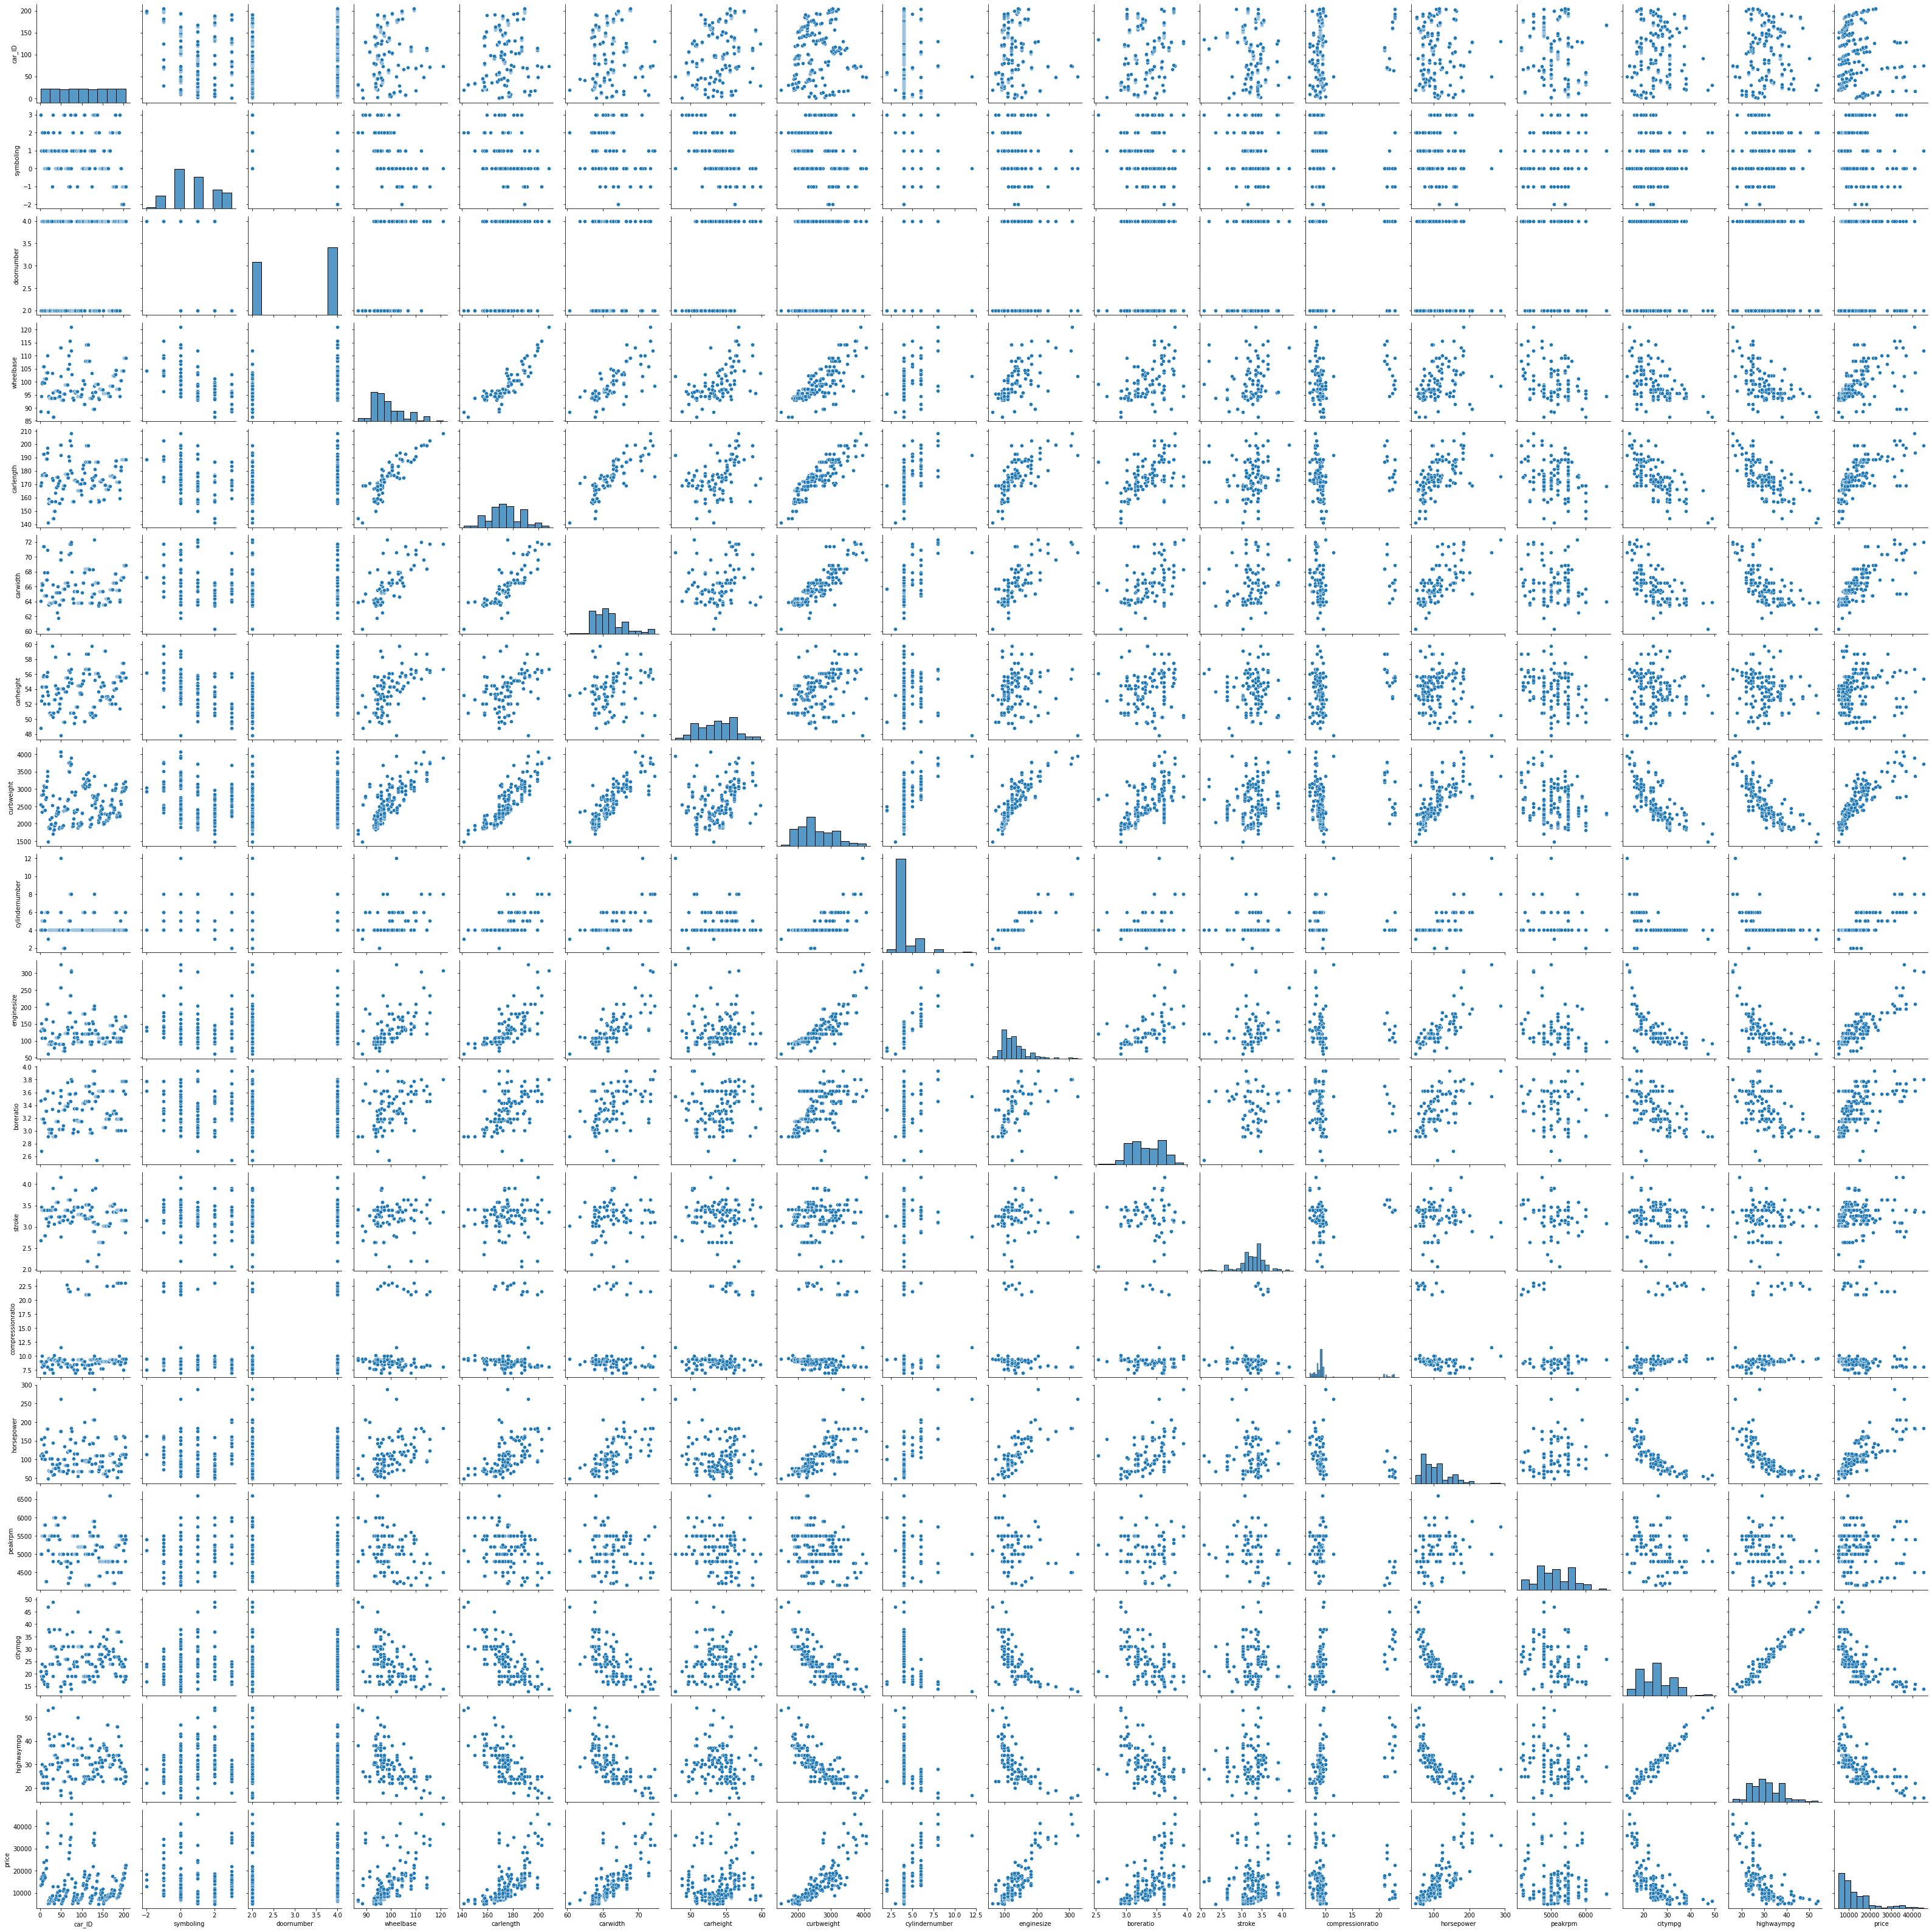

In [14]:
sns.pairplot(data)
plt.show()

Visualising Categorical Variables

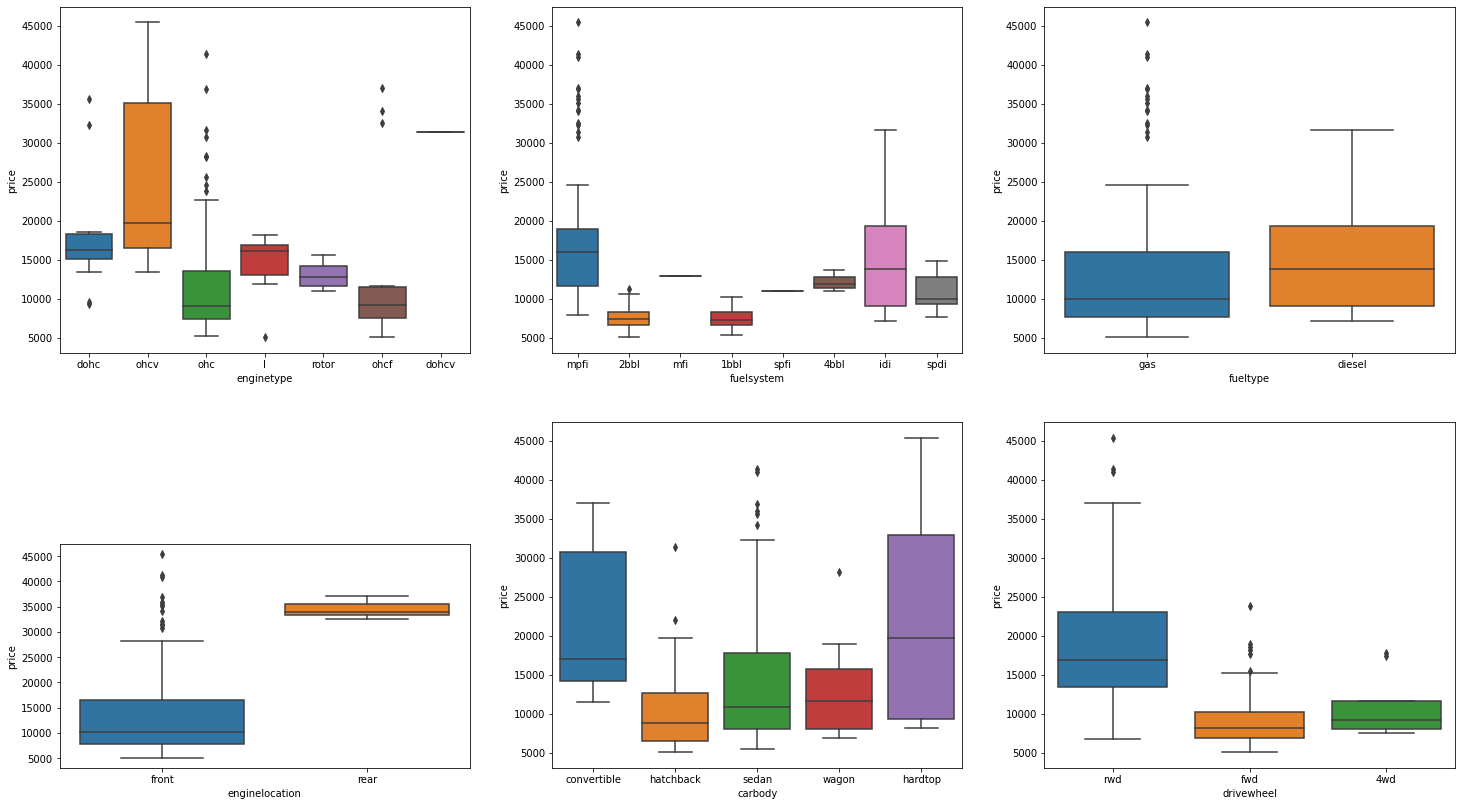

In [15]:
plt.figure(figsize=(25, 14))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.show()

Converting Categorical data to numericals
1. carbody
2. enginetype
3. fuelsystem
4. fueltype
5. aspiration
6. drivewheel
7. enginelocation
8. CarName

In [16]:
print(data['carbody'].value_counts())  #Apply hot encoding  
print(data['carbody'].unique())
print(data['enginetype'].unique())
print(data['fuelsystem'].unique()) 
print(data['fueltype'].unique())
print(data['aspiration'].unique())
print(data['drivewheel'].unique())
print(data['enginelocation'].unique())

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['gas' 'diesel']
['std' 'turbo']
['rwd' 'fwd' '4wd']
['front' 'rear']


In [17]:
data = pd.get_dummies(data, columns=['carbody'])

In [18]:
data.head()

car_ID  symboling                   CarName fueltype aspiration  \
0       1          3        alfa-romero giulia      gas        std   
1       2          3       alfa-romero stelvio      gas        std   
2       3          1  alfa-romero Quadrifoglio      gas        std   
3       4          2                audi 100ls      gas        std   
4       5          2                audi 100ls      gas        std   

   doornumber drivewheel enginelocation  wheelbase  carlength  ...  \
0           2        rwd          front       88.6      168.8  ...   
1           2        rwd          front       88.6      168.8  ...   
2           2        rwd          front       94.5      171.2  ...   
3           4        fwd          front       99.8      176.6  ...   
4           4        4wd          front       99.4      176.6  ...   

   horsepower  peakrpm  citympg highwaympg    price  carbody_convertible  \
0         111     5000       21         27  13495.0                    1   
1         111     5000       21         27  16500.0                    1   
2         154     5000       19         26  16500.0                    0   
3         102     5500       24         30  13950.0                    0   
4         115     5500       18         22  17450.0                    0   

  carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  
0               0                  0              0              0  
1               0                  0              0              0  
2               0                  1              0              0  
3               0                  0              1              0  
4               0                  0              1              0  

[5 rows x 30 columns]

In [19]:
data = pd.get_dummies(data, columns=['enginetype', 'fuelsystem', 'fueltype', 'aspiration', 'drivewheel', 'enginelocation'])

In [20]:
data = pd.get_dummies(data, columns=['CarName'])

In [21]:
data.head(15)

car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0        1          3           2       88.6      168.8      64.1       48.8   
1        2          3           2       88.6      168.8      64.1       48.8   
2        3          1           2       94.5      171.2      65.5       52.4   
3        4          2           4       99.8      176.6      66.2       54.3   
4        5          2           4       99.4      176.6      66.4       54.3   
5        6          2           2       99.8      177.3      66.3       53.1   
6        7          1           4      105.8      192.7      71.4       55.7   
7        8          1           4      105.8      192.7      71.4       55.7   
8        9          1           4      105.8      192.7      71.4       55.9   
9       10          0           2       99.5      178.2      67.9       52.0   
10      11          2           2      101.2      176.8      64.8       54.3   
11      12          0           4      101.2      176.8      64.8       54.3   
12      13          0           2      101.2      176.8      64.8       54.3   
13      14          0           4      101.2      176.8      64.8       54.3   
14      15          1           4      103.5      189.0      66.9       55.7   

    curbweight  cylindernumber  enginesize  ...  CarName_volkswagen type 3  \
0         2548               4         130  ...                          0   
1         2548               4         130  ...                          0   
2         2823               6         152  ...                          0   
3         2337               4         109  ...                          0   
4         2824               5         136  ...                          0   
5         2507               5         136  ...                          0   
6         2844               5         136  ...                          0   
7         2954               5         136  ...                          0   
8         3086               5         131  ...                          0   
9         3053               5         131  ...                          0   
10        2395               4         108  ...                          0   
11        2395               4         108  ...                          0   
12        2710               6         164  ...                          0   
13        2765               6         164  ...                          0   
14        3055               6         164  ...                          0   

    CarName_volvo 144ea  CarName_volvo 145e (sw)  CarName_volvo 244dl  \
0                     0                        0                    0   
1                     0                        0                    0   
2                     0                        0                    0   
3                     0                        0                    0   
4                     0                        0                    0   
5                     0                        0                    0   
6                     0                        0                    0   
7                     0                        0                    0   
8                     0                        0                    0   
9                     0                        0                    0   
10                    0                        0                    0   
11                    0                        0                    0   
12                    0                        0                    0   
13                    0                        0                    0   
14                    0                        0                    0   

    CarName_volvo 245  CarName_volvo 246  CarName_volvo 264gl  \
0                   0                  0                    0   
1                   0                  0                    0   
2                   0                  0                    0   
3                   0                  0     

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 193 entries, car_ID to CarName_vw rabbit
dtypes: float64(8), int64(10), uint8(175)
memory usage: 64.0 KB


In [23]:
data.head(15)

car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0        1          3           2       88.6      168.8      64.1       48.8   
1        2          3           2       88.6      168.8      64.1       48.8   
2        3          1           2       94.5      171.2      65.5       52.4   
3        4          2           4       99.8      176.6      66.2       54.3   
4        5          2           4       99.4      176.6      66.4       54.3   
5        6          2           2       99.8      177.3      66.3       53.1   
6        7          1           4      105.8      192.7      71.4       55.7   
7        8          1           4      105.8      192.7      71.4       55.7   
8        9          1           4      105.8      192.7      71.4       55.9   
9       10          0           2       99.5      178.2      67.9       52.0   
10      11          2           2      101.2      176.8      64.8       54.3   
11      12          0           4      101.2      176.8      64.8       54.3   
12      13          0           2      101.2      176.8      64.8       54.3   
13      14          0           4      101.2      176.8      64.8       54.3   
14      15          1           4      103.5      189.0      66.9       55.7   

    curbweight  cylindernumber  enginesize  ...  CarName_volkswagen type 3  \
0         2548               4         130  ...                          0   
1         2548               4         130  ...                          0   
2         2823               6         152  ...                          0   
3         2337               4         109  ...                          0   
4         2824               5         136  ...                          0   
5         2507               5         136  ...                          0   
6         2844               5         136  ...                          0   
7         2954               5         136  ...                          0   
8         3086               5         131  ...                          0   
9         3053               5         131  ...                          0   
10        2395               4         108  ...                          0   
11        2395               4         108  ...                          0   
12        2710               6         164  ...                          0   
13        2765               6         164  ...                          0   
14        3055               6         164  ...                          0   

    CarName_volvo 144ea  CarName_volvo 145e (sw)  CarName_volvo 244dl  \
0                     0                        0                    0   
1                     0                        0                    0   
2                     0                        0                    0   
3                     0                        0                    0   
4                     0                        0                    0   
5                     0                        0                    0   
6                     0                        0                    0   
7                     0                        0                    0   
8                     0                        0                    0   
9                     0                        0                    0   
10                    0                        0                    0   
11                    0                        0                    0   
12                    0                        0                    0   
13                    0                        0                    0   
14                    0                        0                    0   

    CarName_volvo 245  CarName_volvo 246  CarName_volvo 264gl  \
0                   0                  0                    0   
1                   0                  0                    0   
2                   0                  0                    0   
3                   0                  0     

Split the data to Training Set and Testing Set using train-test split

In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
print(df_train.shape)
print(df_test.shape)

(143, 193)
(62, 193)


Rescaling the features

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
df_train.head(15)

car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
122     123        0.6           4   0.244828   0.426016  0.291667   0.265487   
125     126        1.0           2   0.272414   0.452033  0.666667   0.212389   
166     167        0.6           2   0.272414   0.448780  0.308333   0.424779   
1         2        1.0           2   0.068966   0.450407  0.316667   0.088496   
199     200        0.2           4   0.610345   0.775610  0.575000   0.858407   
190     191        1.0           2   0.272414   0.400000  0.308333   0.318584   
96       97        0.6           4   0.272414   0.393496  0.291667   0.592920   
177     178        0.2           4   0.544828   0.560976  0.516667   0.539823   
181     182        0.2           4   0.617241   0.759350  0.516667   0.557522   
97       98        0.6           4   0.272414   0.473171  0.291667   0.504425   
120     121        0.6           4   0.244828   0.263415  0.291667   0.247788   
117     118        0.4           4   0.737931   0.741463  0.666667   0.725664   
57       58        1.0           2   0.300000   0.453659  0.450000   0.159292   
44       45        0.6           2   0.272414   0.240650  0.275000   0.371681   
153     154        0.4           4   0.313793   0.465041  0.275000   1.000000   

     curbweight  cylindernumber  enginesize  ...  CarName_volkswagen type 3  \
122    0.272692               4          98  ...                          0   
125    0.500388               4         151  ...                          0   
166    0.314973               4          98  ...                          0   
1      0.411171               4         130  ...                          0   
199    0.647401               4         130  ...                          0   
190    0.284329               4         109  ...                          0   
96     0.187355               4          97  ...                          0   
177    0.376261               4         122  ...                          0   
181    0.645074               6         161  ...                          0   
97     0.212956               4          97  ...                          0   
120    0.185803               4          90  ...                          0   
117    0.636928               4         134  ...                          0   
57     0.347944               2          70  ...                          0   
44     0.149728               4          90  ...                          0   
153    0.307215               4          92  ...                          0   

     CarName_volvo 144ea  CarName_volvo 145e (sw)  CarName_volvo 244dl  \
122                    0                        0                    0   
125                    0                        0                    0   
166                    0                        0                    0   
1                      0                        0                    0   
199                    0                        0                    0   
190                    0                        0                    0   
96                     0                        0                    0   
177                    0                        0                    0   
181                    0                        0                    0   
97                     0                        0                    0   
120                    0                        0                    0   
117                    0                        0                    0   
57                     0                        0                    0   
44                     0                        0                    0   
153                    0                        0                    0   

     CarName_volvo 245  CarName_volvo 246  CarName_volvo 264gl  \
122                  0                  0                    0   
125                  0                  0                    0   
166                  0                  0                   

In [30]:
df_train.describe()

car_ID   symboling  doornumber   wheelbase   carlength    carwidth  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean    98.524476    0.559441    3.118881    0.411141    0.525476    0.461655   
std     58.977655    0.239200    0.996399    0.205581    0.204848    0.184517   
min      1.000000    0.000000    2.000000    0.000000    0.000000    0.000000   
25%     48.500000    0.400000    2.000000    0.272414    0.399187    0.304167   
50%     97.000000    0.600000    4.000000    0.341379    0.502439    0.425000   
75%    147.500000    0.600000    4.000000    0.503448    0.669919    0.550000   
max    205.000000    1.000000    4.000000    1.000000    1.000000    1.000000   

        carheight  curbweight  cylindernumber  enginesize  ...  \
count  143.000000  143.000000      143.000000  143.000000  ...   
mean     0.509004    0.407878        4.405594  124.958042  ...   
std      0.215378    0.211269        1.158178   40.974034  ...   
min      0.000000    0.000000        2.000000   61.000000  ...   
25%      0.353982    0.245539        4.000000   97.000000  ...   
50%      0.522124    0.355702        4.000000  110.000000  ...   
75%      0.668142    0.559542        4.000000  141.000000  ...   
max      1.000000    1.000000       12.000000  326.000000  ...   

       CarName_volkswagen type 3  CarName_volvo 144ea  \
count                 143.000000                143.0   
mean                    0.006993                  0.0   
std                     0.083624                  0.0   
min                     0.000000                  0.0   
25%                     0.000000                  0.0   
50%                     0.000000                  0.0   
75%                     0.000000                  0.0   
max                     1.000000                  0.0   

       CarName_volvo 145e (sw)  CarName_volvo 244dl  CarName_volvo 245  \
count               143.000000           143.000000              143.0   
mean                  0.006993             0.013986                0.0   
std                   0.083624             0.117845                0.0   
min                   0.000000             0.000000                0.0   
25%                   0.000000             0.000000                0.0   
50%                   0.000000             0.000000                0.0   
75%                   0.000000             0.000000                0.0   
max                   1.000000             1.000000                0.0   

       CarName_volvo 246  CarName_volvo 264gl  CarName_volvo diesel  \
count         143.000000           143.000000            143.000000   
mean            0.006993             0.006993              0.006993   
std             0.083624             0.083624              0.083624   
min             0.000000             0.000000              0.000000   
25%             0.000000             0.000000              0.000000   
50%             0.000000             0.000000              0.000000   
75%             0.000000             0.000000              0.000000   
max             1.000000             1.000000              1.000000   

       CarName_vw dasher  CarName_vw rabbit  
count         143.000000         143.000000  
mean            0.006993           0.006993  
std             0.083624           0.083624  
min             0.000000           0.000000  
25%             0.000000           0.000000  
50%             0.000000           0.000000  
75%             0.000000           0.000000  
max             1.000000           1.000000  

[8 rows x 193 columns]

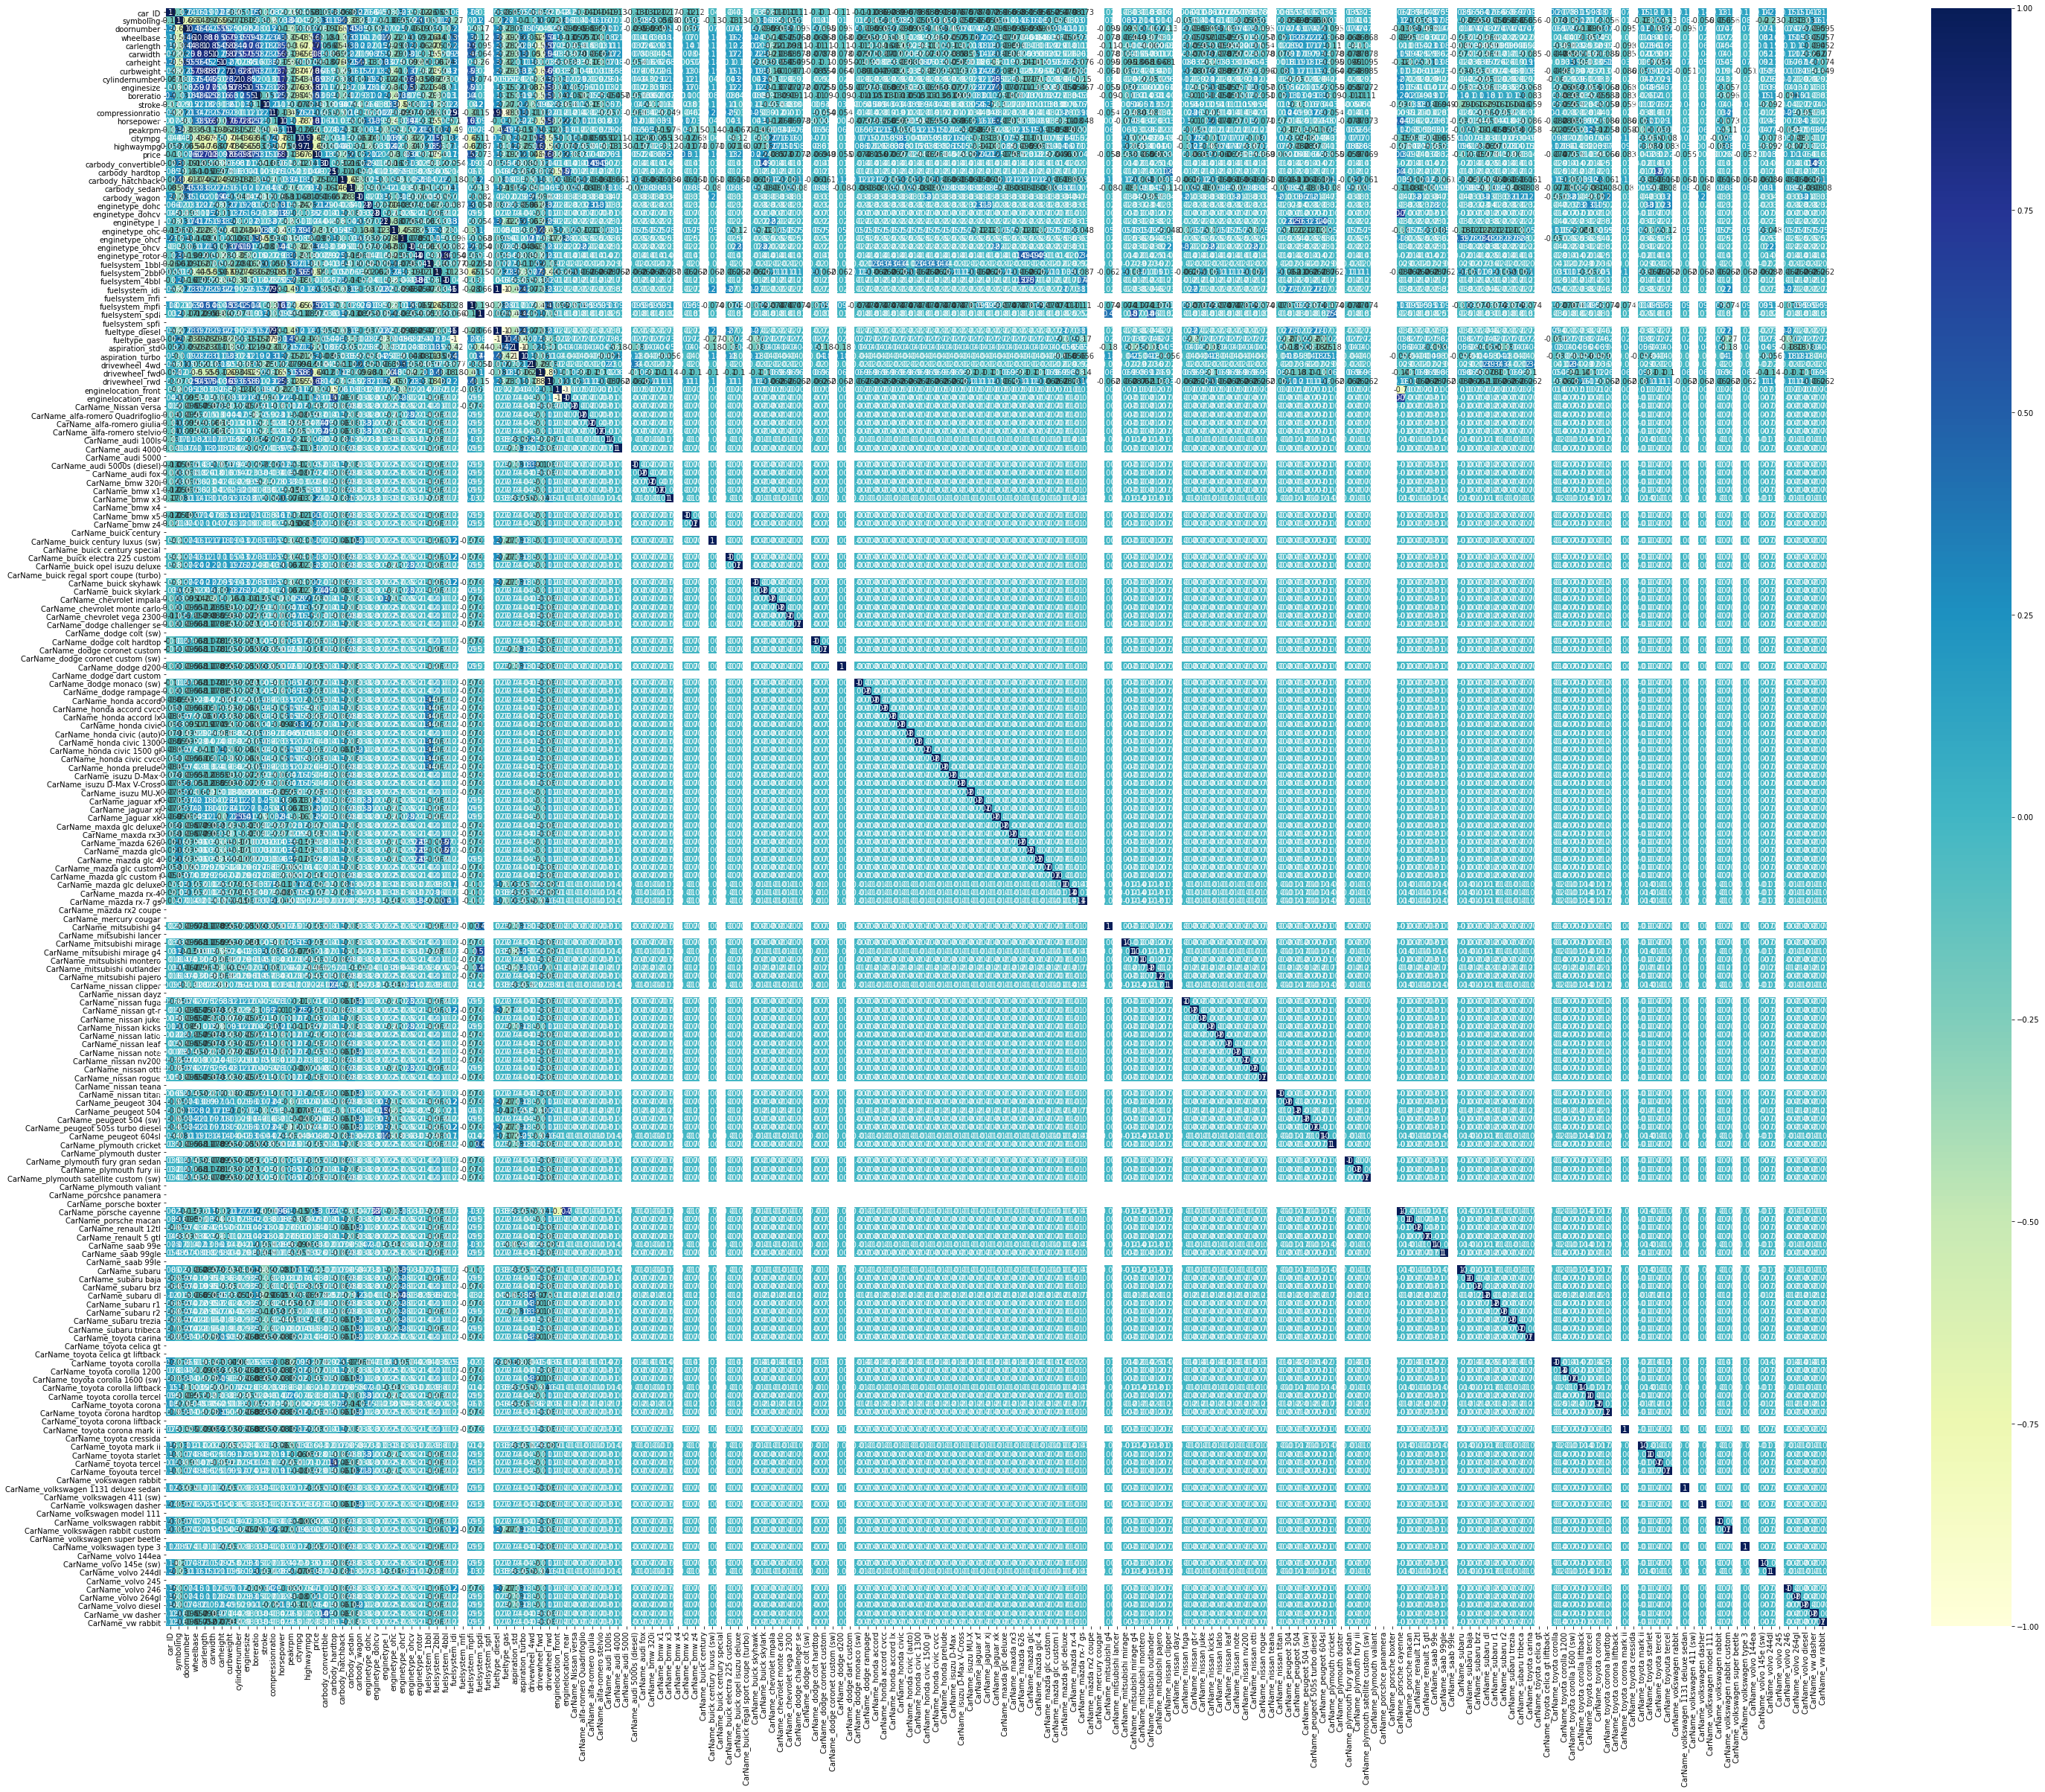

In [31]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Correlation seems to be among these features : carlength, carwidth, curbweight, wheelbase, price, compressionratio, (horsepower & price)

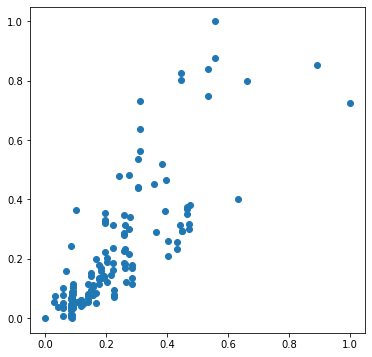

In [32]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.horsepower, df_train.price)
plt.show()

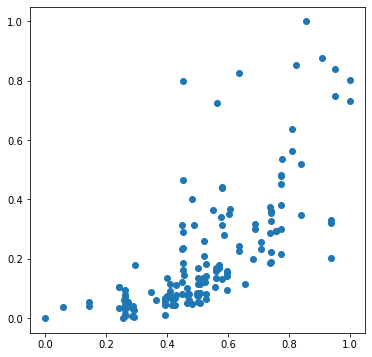

In [33]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.carlength, df_train.price)
plt.show()

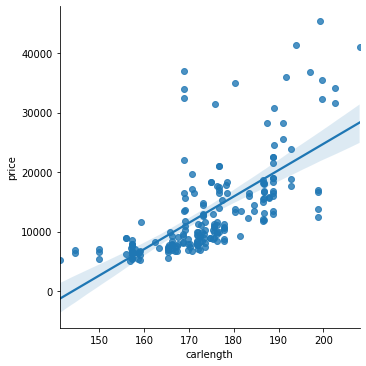

In [34]:
sns.lmplot('carlength','price', data)

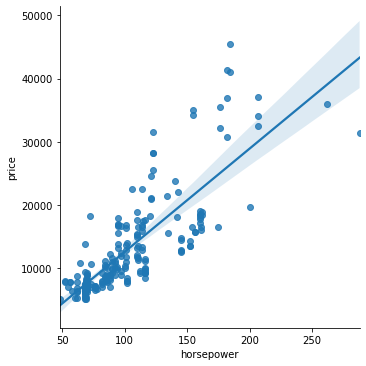

In [35]:
sns.lmplot('horsepower','price', data)

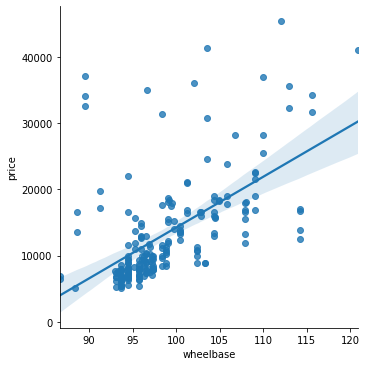

In [36]:
sns.lmplot('wheelbase','price', data)

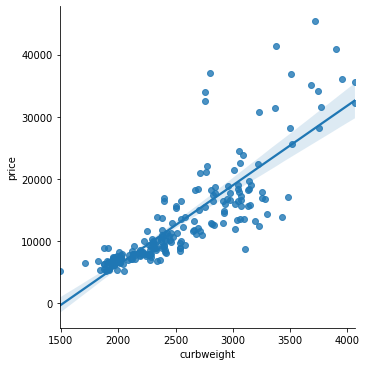

In [37]:
sns.lmplot('curbweight','price', data)

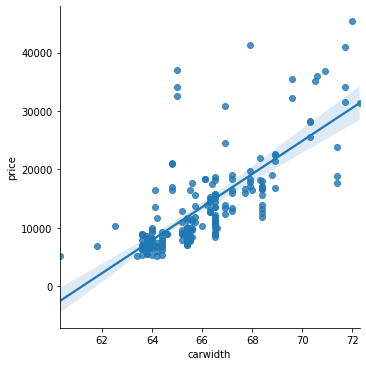

In [38]:
sns.lmplot('carwidth','price', data)

Model Building

In [39]:
y_train = df_train.pop('price')
X_train = df_train

Building Model using Linear Regression function with RFE (recursive feature elimination)
1) Import RFE from scikit learn and run rfe and fit with 15 output variables and form the rfe.support_ features
2) Building model using statsmodel with RFE selected variables from step 3
3) Residual Analysis of the train data (Prediction on the train data)
4) Making predictions on Test Data by scaling 
5) Making Evaluation on Test data

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('car_ID', False, 153),
 ('symboling', False, 68),
 ('doornumber', False, 110),
 ('wheelbase', False, 34),
 ('carlength', False, 81),
 ('carwidth', False, 121),
 ('carheight', False, 140),
 ('curbweight', False, 86),
 ('cylindernumber', False, 65),
 ('enginesize', False, 139),
 ('boreratio', False, 64),
 ('stroke', False, 47),
 ('compressionratio', False, 56),
 ('horsepower', False, 33),
 ('peakrpm', False, 113),
 ('citympg', False, 141),
 ('highwaympg', False, 46),
 ('carbody_convertible', False, 29),
 ('carbody_hardtop', False, 115),
 ('carbody_hatchback', False, 130),
 ('carbody_sedan', False, 149),
 ('carbody_wagon', False, 90),
 ('enginetype_dohc', False, 25),
 ('enginetype_dohcv', False, 23),
 ('enginetype_l', False, 22),
 ('enginetype_ohc', False, 26),
 ('enginetype_ohcf', False, 9),
 ('enginetype_ohcv', False, 27),
 ('enginetype_rotor', False, 3),
 ('fuelsystem_1bbl', True, 1),
 ('fuelsystem_2bbl', True, 1),
 ('fuelsystem_4bbl', True, 1),
 ('fuelsystem_idi', True, 1),
 ('fuels

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fueltype_diesel', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       ...
       'CarName_volkswagen type 3', 'CarName_volvo 144ea',
       'CarName_volvo 145e (sw)', 'CarName_volvo 244dl', 'CarName_volvo 245',
       'CarName_volvo 246', 'CarName_volvo 264gl', 'CarName_volvo diesel',
       'CarName_vw dasher', 'CarName_vw rabbit'],
      dtype='object', length=182)

Building Model using statsmodel

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# Adding constant variable 
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
#Running the linear model

lm = sm.OLS(y_train, X_train_rfe).fit()

In [48]:
# Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     25.42
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           6.82e-22
Time:                        23:01:53   Log-Likelihood:                 77.058
No. Observations:                 143   AIC:                            -138.1
Df Residuals:                     135   BIC:                            -114.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1249      0.018     

CarName_peugeot 504 (sw) and all others whose p> 0.05 are insignificant in presence of other variables; so can be dropped

In [49]:
#X_train_new = X_train_rfe.drop(["enginetype_ohcf", "enginetype_rotor", "fuelsystem_1bbl", "fuelsystem_2bbl", "fuelsystem_4bbl", "fuelsystem_spdi", "drivewheel_4wd", "drivewheel_fwd", "enginelocation_front", "CarName_mazda glc 4", "CarName_peugeot 504 (sw)", "CarName_subaru", "CarName_subaru baja", "CarName_subaru brz", "CarName_subaru dl", "CarName_subaru r1", "CarName_subaru r2", "CarName_subaru trezia", "CarName_subaru tribeca"], axis = 1)


X_train_new = X_train_rfe.drop(["fuelsystem_1bbl", "fuelsystem_2bbl", "fuelsystem_4bbl", "fuelsystem_spdi", "drivewheel_4wd"], axis = 1)

Rebuilding the model without the above features

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [51]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [52]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     43.44
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           1.50e-23
Time:                        23:01:53   Log-Likelihood:                 75.217
No. Observations:                 143   AIC:                            -140.4
Df Residuals:                     138   BIC:                            -125.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0971      0.054     

In [53]:
X_train_new.columns

Index(['const', 'fuelsystem_idi', 'fuelsystem_mpfi', 'fueltype_diesel',
       'drivewheel_fwd', 'drivewheel_rwd'],
      dtype='object')

In [54]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1   fuelsystem_idi    inf
3  fueltype_diesel    inf
0            const  19.38
5   drivewheel_rwd   4.97
4   drivewheel_fwd   4.78
2  fuelsystem_mpfi   1.48

Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [55]:
y_train_price = lm.predict(X_train_lm)

In [56]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Errors')

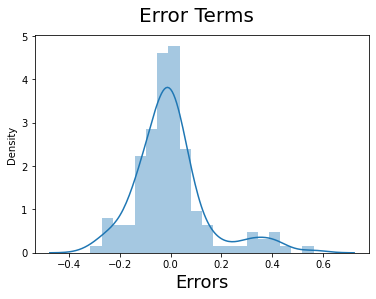

In [57]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Making Predictions

Apply scaling on test dataset

In [58]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

Dividing into X_test and y_test

In [59]:
y_test = df_test.pop('price')
X_test = df_test

In [60]:
print(y_test.shape)
print(X_test.shape)

(62,)
(62, 192)


In [61]:
X_train_new = X_train_new.drop(['const'], axis=1) #, 'drivewheel_fwd'


In [62]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [63]:
X_train_new

fuelsystem_idi  fuelsystem_mpfi  fueltype_diesel  drivewheel_fwd  \
122               0                0                0               1   
125               0                1                0               0   
166               0                1                0               0   
1                 0                1                0               0   
199               0                1                0               0   
..              ...              ...              ...             ...   
87                0                0                0               1   
103               0                1                0               1   
67                1                0                1               0   
24                0                0                0               1   
8                 0                1                0               1   

     drivewheel_rwd  
122               0  
125               1  
166               1  
1                 1  
199               1  
..              ...  
87                0  
103               0  
67                1  
24                0  
8                 0  

[143 rows x 5 columns]

In [64]:
X_test_new

const  fuelsystem_idi  fuelsystem_mpfi  fueltype_diesel  drivewheel_fwd  \
160    1.0               0                0                0               1   
186    1.0               0                1                0               1   
59     1.0               0                0                0               1   
165    1.0               0                1                0               0   
140    1.0               0                0                0               0   
..     ...             ...              ...              ...             ...   
28     1.0               0                0                0               1   
29     1.0               0                0                0               1   
182    1.0               1                0                1               1   
40     1.0               0                0                0               1   
128    1.0               0                1                0               0   

     drivewheel_rwd  
160               0  
186               0  
59                0  
165               1  
140               0  
..              ...  
28                0  
29                0  
182               0  
40                0  
128               1  

[62 rows x 6 columns]

In [65]:
#X_test_new = X_test_new.drop(['const'], axis=1)


In [66]:
# Making predictions
y_pred = lm.predict(X_test_new)

Model Evaluation

Text(0, 0.5, 'y_pred')

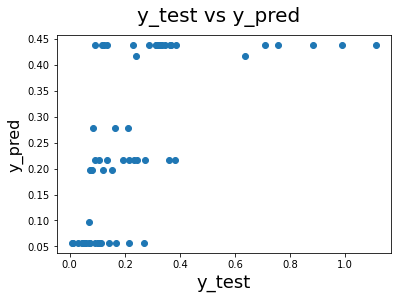

In [67]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label